<a href="https://colab.research.google.com/github/Ssspoke/SMS_Spam/blob/main/spam_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk
import numpy as np
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm.notebook import trange
import nltk.downloader
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [35]:
# Загрузка данных
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

In [36]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
nltk.download('punkt')
df['tokens'] = df['text'].apply(nltk.word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
print('The dataframe is as shown below\n', df)


The dataframe is as shown below
      label                                               text  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   
...    ...                                                ...   
5567  spam  This is the 2nd time we have tried 2 contact u...   
5568   ham              Will Ì_ b going to esplanade fr home?   
5569   ham  Pity, * was in mood for that. So...any other s...   
5570   ham  The guy did some bitching but I acted like i'd...   
5571   ham                         Rofl. Its true to its name   

                                                 tokens  
0     [Go, until, jurong, point, ,, crazy, .., Avail...  
1              [Ok, lar, ..., Joking, wif, u, oni, ...]  
2     [Free,

In [39]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [40]:
# TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf_tfidf = LogisticRegression(max_iter=1000)
clf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

print("TF-IDF results (lr):")
print(classification_report(y_test, y_pred_tfidf))

TF-IDF results (lr):
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



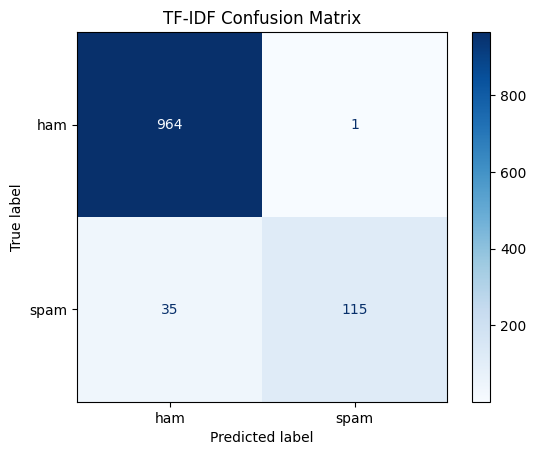

In [41]:
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=clf_tfidf.classes_)
disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=clf_tfidf.classes_)
disp_tfidf.plot(cmap=plt.cm.Blues)
plt.title("TF-IDF Confusion Matrix")
plt.show()


In [42]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [48]:
# RandomForestClassifier
# Применение TF-IDF преобразования к данным
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = DecisionTreeClassifier().fit(X_train_tfidf, y_train)

#Prediction
y_pred_rf = model.predict(X_test_tfidf)
print("TF-IDF results (rf):")
print(classification_report(y_test, y_pred_rf))

TF-IDF results (rf):
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       965
        spam       0.90      0.85      0.87       150

    accuracy                           0.97      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



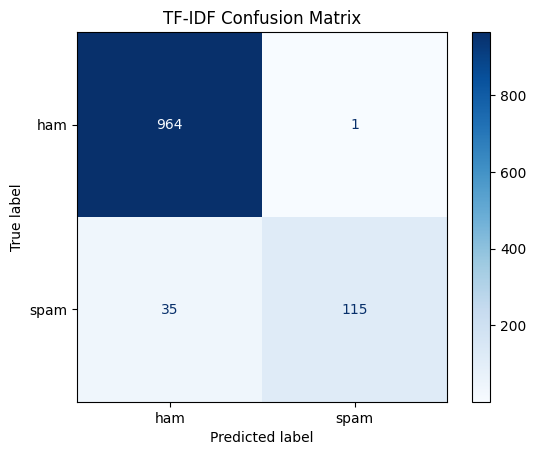

In [46]:
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=clf_tfidf.classes_)
disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=clf_tfidf.classes_)
disp_tfidf.plot(cmap=plt.cm.Blues)
plt.title("TF-IDF Confusion Matrix")
plt.show()

In [25]:
# Word Embeddings (GloVe)
glove = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [26]:
def get_embedding(text):
    tokens = nltk.word_tokenize(text.lower())
    vectors = [glove[word] for word in tokens if word in glove]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(glove.vector_size)


In [27]:
X_train_emb = np.vstack(X_train.apply(get_embedding))
X_test_emb = np.vstack(X_test.apply(get_embedding))
